In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

<h2>Read the file</h2>

In [2]:
df = pd.read_csv("churn.csv")

In [3]:
df.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
0,"""R1 - AM Lisboa""","""Lisboa""","""Amadora""","""Sep-19 to Feb-20""","""Female""","""15-24""",294.194206
1,"""R1 - AM Lisboa""","""Lisboa""","""Amadora""","""Sep-19 to Feb-20""","""Female""","""25-34""",1081.652817
2,"""R1 - AM Lisboa""","""Lisboa""","""Amadora""","""Sep-19 to Feb-20""","""Female""","""35-44""",235.836653
3,"""R1 - AM Lisboa""","""Lisboa""","""Amadora""","""Sep-19 to Feb-20""","""Female""","""45-54""",840.951323
4,"""R1 - AM Lisboa""","""Lisboa""","""Amadora""","""Sep-19 to Feb-20""","""Female""","""55-64""",1216.148092


In [4]:
df.dtypes

Region_of_Origin             object
District_of_Origin           object
County_of_Origin             object
Period                       object
GenderDescription            object
AgeClassDescription          object
Average_BusUsers_per_Day    float64
dtype: object

<h2>Convert the string values to numeric values using onethe models</h2>

In [5]:
data = ['District_of_Origin','County_of_Origin','Period','GenderDescription','AgeClassDescription']

In [6]:
for column in data:
    ord_enc = OrdinalEncoder()
    df[column] = ord_enc.fit_transform(df[[column]])

In [7]:
df.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
0,"""R1 - AM Lisboa""",1.0,2.0,0.0,0.0,0.0,294.194206
1,"""R1 - AM Lisboa""",1.0,2.0,0.0,0.0,1.0,1081.652817
2,"""R1 - AM Lisboa""",1.0,2.0,0.0,0.0,2.0,235.836653
3,"""R1 - AM Lisboa""",1.0,2.0,0.0,0.0,3.0,840.951323
4,"""R1 - AM Lisboa""",1.0,2.0,0.0,0.0,4.0,1216.148092


<h2>Evaluating feature importance using RandomForest Regressor</h2>

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [9]:
feature1 = df['District_of_Origin']
feature2 = df['Period']
feature3 = df['GenderDescription']
feature4 = df['AgeClassDescription']
feature5 = df['County_of_Origin']

In [10]:
features = [feature1,feature2,feature3,feature4,feature5]

In [11]:
X = pd.DataFrame(features).T

In [12]:
X.head()

,District_of_Origin,Period,GenderDescription,AgeClassDescription,County_of_Origin
0,1.0,0.0,0.0,0.0,2.0
1,1.0,0.0,0.0,1.0,2.0
2,1.0,0.0,0.0,2.0,2.0
3,1.0,0.0,0.0,3.0,2.0
4,1.0,0.0,0.0,4.0,2.0


In [13]:
Y = df['Average_BusUsers_per_Day']

In [27]:
X_train, X_test, y_train, y_te = train_test_split(X, Y, test_size = 0.8, random_state = 20)

In [28]:
rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 20)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=20)

In [25]:
rf.feature_importances_


array([0.10501472, 0.08332976, 0.21003466, 0.29843208, 0.30318878])

From the graph below, we can conclude that Age,County of origin and Gender are the top features that contibute more to the prediction

Text(0.5, 0, 'Random Forest Feature Importance')

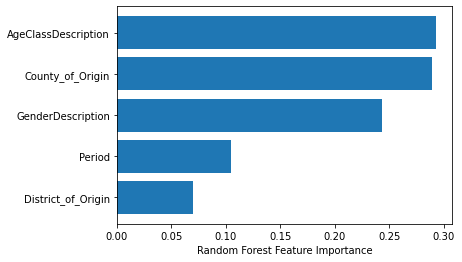

In [29]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

<h2>Visualising the tree using Graphviz and pydot libaries</h2>

In [18]:
estimator = rf.estimators_[5]
from sklearn.tree import export_graphviz

In [30]:
export_graphviz(estimator,out_file ='tree.dot',feature_names = X_train.columns.tolist(),class_names =y_train.name,rounded=True,proportion =False,precision=2,filled=True)

In [33]:
import graphviz
import pydot

ModuleNotFoundError: No module named 'graphviz'

In [35]:
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

NameError: name 'pydot' is not defined

In [ ]:
from IPython.display import Image

In [36]:
Image(filename='tree.png' )

FileNotFoundError: [Errno 2] No such file or directory: 'tree.png'